# Child Class Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


## Data

In [2]:
child_data = pd.read_csv('./Dataset_Proyek2/child_data_rev.csv')
child_data.head()

,Name,Sex,Age,Height,Weight,Status
0,Ffion Winter,Female,5,100,11,Underweight
1,Anya Singleton,Female,3,97,15,Normal
2,Elisha Acevedo,Female,3,100,18,Overweight
3,Caroline Miles,Female,3,77,12,Stunting
4,Bryony Cameron,Female,1,94,10,Normal


In [3]:
child_data.shape

(100, 6)

In [4]:
child_data.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Status    0
dtype: int64

In [5]:
child_data.drop(['Name'], axis= 1, inplace = True)
child_data.head()

,Sex,Age,Height,Weight,Status
0,Female,5,100,11,Underweight
1,Female,3,97,15,Normal
2,Female,3,100,18,Overweight
3,Female,3,77,12,Stunting
4,Female,1,94,10,Normal


In [6]:
child_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     100 non-null    object
 1   Age     100 non-null    int64 
 2   Height  100 non-null    int64 
 3   Weight  100 non-null    int64 
 4   Status  100 non-null    object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [7]:
child_data.describe()

,Age,Height,Weight
count,100.000000,100.000000,100.000000
mean,2.900000,88.530000,14.190000
std,1.403459,10.757619,3.469041
min,1.000000,70.000000,9.000000
25%,2.000000,79.000000,11.000000
50%,3.000000,89.000000,14.000000
75%,4.000000,99.000000,17.000000
max,5.000000,107.000000,20.000000


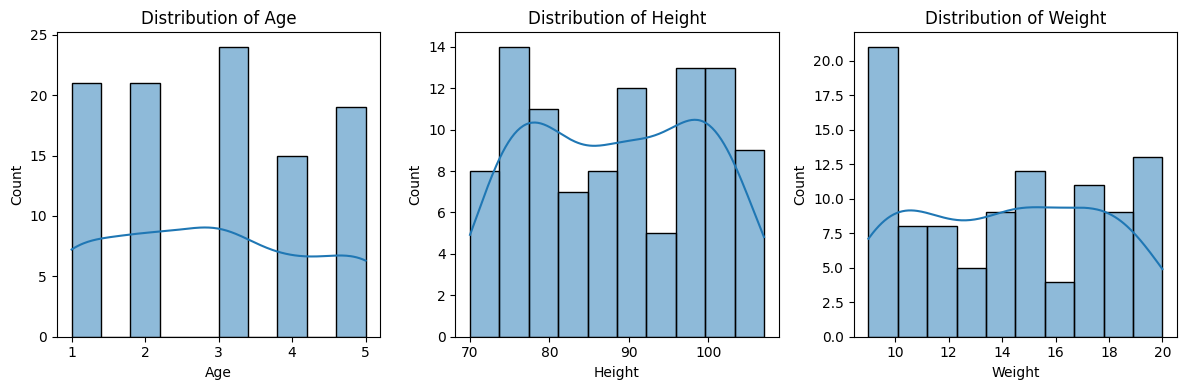

In [8]:
# Histogram untuk umur, tinggi, dan berat badan
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(child_data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(child_data['Height'], bins=10, kde=True)
plt.title('Distribution of Height')

plt.subplot(1, 3, 3)
sns.histplot(child_data['Weight'], bins=10, kde=True)
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

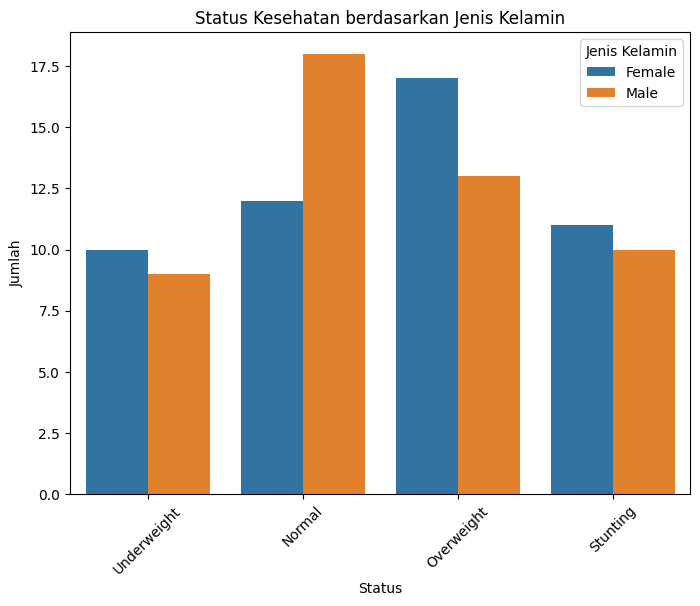

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', hue='Sex', data=child_data)
plt.title('Status Kesehatan berdasarkan Jenis Kelamin')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Kelamin')
plt.xticks(rotation=45)
plt.show()

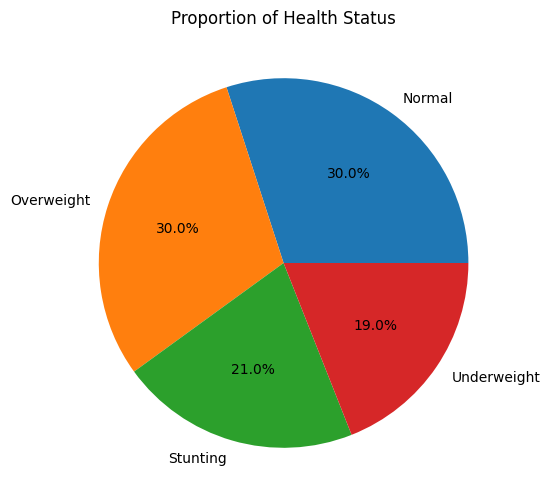

In [10]:
# Pie chart status kesehatan
status_counts = child_data['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Health Status')
plt.show()

## Mengecek Outlier

<Figure size 640x480 with 0 Axes>

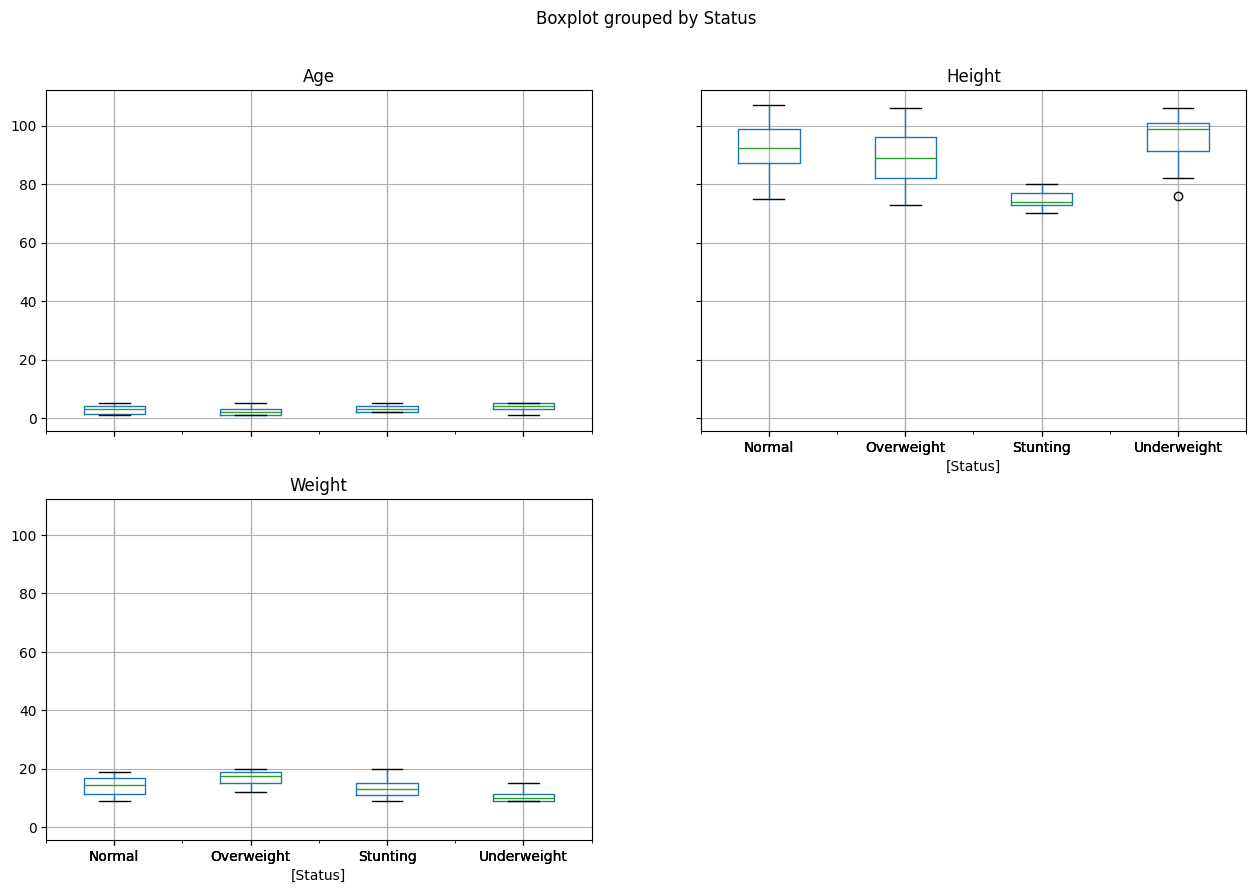

In [11]:
# Box plot untuk umur, tinggi, dan berat badan
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=child_data[['Age', 'Height', 'Weight']])
# plt.title('Box plot of Age, Height, and Weight')
# plt.show()

plt.figure()
child_data.boxplot(by="Status", figsize=(15, 10))
plt.show()


## Scatter Plot

In [12]:
child_data['Status'].value_counts()

Status
Normal         30
Overweight     30
Stunting       21
Underweight    19
Name: count, dtype: int64

In [13]:
colors = ['red', 'blue', 'green', 'yellow']
status = ['Stunting', 'Normal', 'Overweight', 'Underweight']

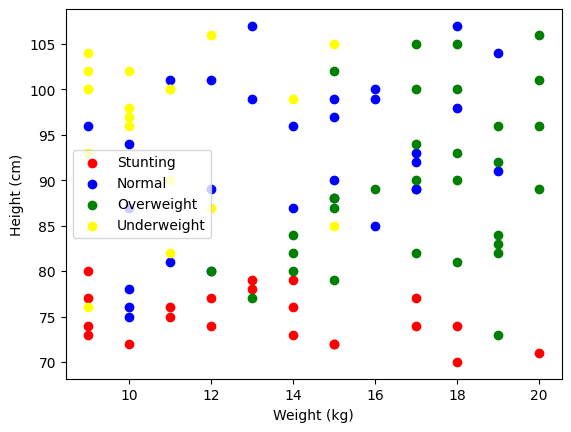

In [14]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Weight'], x['Height'], c = colors[i], label = status[i])

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()

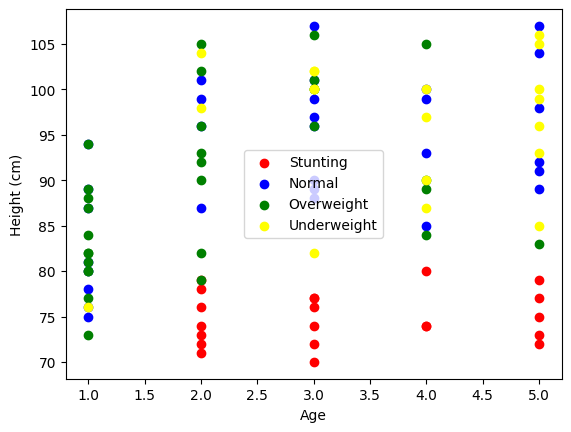

In [15]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Age'], x['Height'], c = colors[i], label = status[i])

plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.legend()

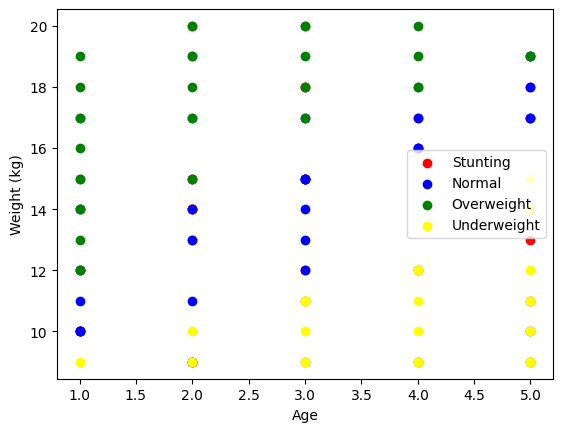

In [16]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Age'], x['Weight'], c = colors[i], label = status[i])

plt.xlabel('Age')
plt.ylabel('Weight (kg)')
plt.legend()

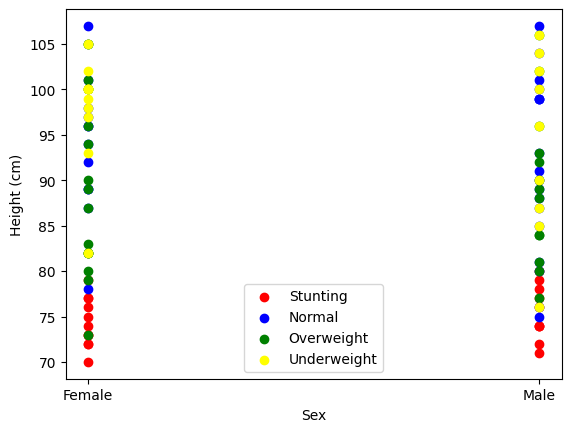

In [17]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Sex'], x['Height'], c = colors[i], label = status[i])

plt.xlabel('Sex')
plt.ylabel('Height (cm)')
plt.legend()

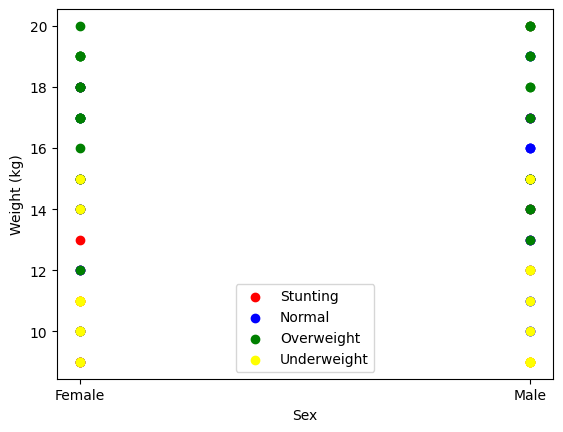

In [18]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Sex'], x['Weight'], c = colors[i], label = status[i])

plt.xlabel('Sex')
plt.ylabel('Weight (kg)')
plt.legend()

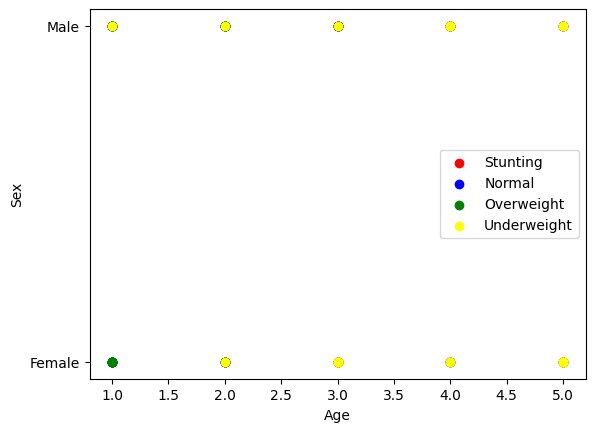

In [19]:
for i in range(len(colors)):
    x = child_data[child_data['Status'] == status[i]]
    plt.scatter(x['Age'], x['Sex'], c = colors[i], label = status[i])

plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()

## Correlation Matrix

### Label Encoder

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

In [21]:
child_data.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Status'], dtype='object')

In [22]:
child_data['Sex'] = le.fit_transform(child_data['Sex'])
child_data.head()

,Sex,Age,Height,Weight,Status
0,0,5,100,11,Underweight
1,0,3,97,15,Normal
2,0,3,100,18,Overweight
3,0,3,77,12,Stunting
4,0,1,94,10,Normal


In [23]:
child_data_corr = child_data.drop(columns= ['Status'])

<Axes: >

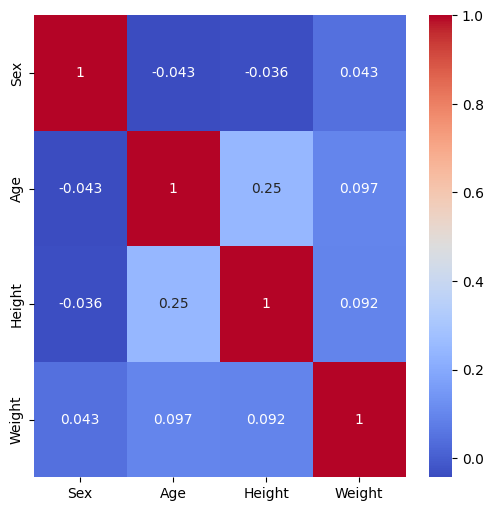

In [24]:
corr = child_data_corr.corr()
fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

In [25]:
child_data['Status'] = le.fit_transform(child_data['Status'])
child_data.head()

,Sex,Age,Height,Weight,Status
0,0,5,100,11,3
1,0,3,97,15,0
2,0,3,100,18,1
3,0,3,77,12,2
4,0,1,94,10,0


In [26]:
child_data.tail()

,Sex,Age,Height,Weight,Status
95,1,4,99,16,0
96,1,4,85,16,0
97,1,4,93,17,0
98,1,2,78,13,2
99,1,2,90,17,1


## Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# 80 train
# 20 test

X = child_data[['Age', 'Height', 'Weight']]  # Pilih kolom fitur yang ingin Anda gunakan
y = pd.get_dummies(child_data['Status'])  # Mengubah kolom Status menjadi one-hot encoded

# Normalisasi data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 42)
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

In [28]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Tambahkan dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Tambahkan dropout
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

In [29]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Melatih model
model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/500
2/2 [==============================] - 1s 202ms/step - loss: 1.3886 - accuracy: 0.2500 - val_loss: 1.3899 - val_accuracy: 0.2000
Epoch 2/500
2/2 [==============================] - 0s 31ms/step - loss: 1.3542 - accuracy: 0.2750 - val_loss: 1.3764 - val_accuracy: 0.2000
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 1.3434 - accuracy: 0.3125 - val_loss: 1.3646 - val_accuracy: 0.2000
Epoch 4/500
2/2 [==============================] - 0s 30ms/step - loss: 1.3249 - accuracy: 0.3625 - val_loss: 1.3539 - val_accuracy: 0.2000
Epoch 5/500
2/2 [==============================] - 0s 37ms/step - loss: 1.3220 - accuracy: 0.3375 - val_loss: 1.3427 - val_accuracy: 0.2000
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 1.2914 - accuracy: 0.3750 - val_loss: 1.3315 - val_accuracy: 0.2000
Epoch 7/500
2/2 [==============================] - 0s 31ms/step - loss: 1.2786 - accuracy: 0.4125 - val_loss: 1.3203 - val_accuracy: 0.2000
Epoch 8/500
2/2 [==

In [31]:
predictions = model.predict(X_normalized)

predicted_statuses = pd.DataFrame(predictions, columns=y.columns)
print(predicted_statuses)

4/4 [==============================] - 0s 0s/step
           0             1             2             3
0   0.000594  5.243213e-09  5.851713e-06  9.993998e-01
1   0.986674  1.261075e-02  1.289714e-05  7.021650e-04
2   0.037291  9.627082e-01  6.614564e-07  1.314356e-07
3   0.002324  1.176039e-04  9.941431e-01  3.415026e-03
4   0.989209  1.140145e-03  9.121018e-06  9.641430e-03
..       ...           ...           ...           ...
95  0.994579  3.348136e-03  2.395170e-06  2.070384e-03
96  0.916798  5.571894e-02  2.114236e-02  6.340665e-03
97  0.975732  2.351255e-02  2.226182e-05  7.330941e-04
98  0.123962  2.805149e-02  8.462911e-01  1.695069e-03
99  0.005360  9.946240e-01  1.621673e-05  2.629101e-08

[100 rows x 4 columns]


In [32]:
# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 [==============================] - 0s 24ms/step - loss: 0.5854 - accuracy: 0.8000
Loss: 0.58542799949646, Accuracy: 0.800000011920929
